In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

In [2]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils import *
import CMS_lumi

Welcome to JupyROOT 6.20/02


In [3]:
def make_pdf(h):

    sumOverY = {}
    for ix in range(1, h.GetNbinsX()+1):
        sumOverY[ix] = sum([h.GetBinContent(ix, iy_) for iy_ in range(1, h.GetNbinsY()+1)])
        for iy in range(1, h.GetNbinsY()+1):
            binc = h.GetBinContent(ix, iy)
            if sumOverY[ix] > 0.:
                h.SetBinContent(ix, iy, binc/sumOverY[ix])

    return h

In [4]:
#year = '2016'
year = '2017'
#year = '2018'
kdata = 'data%s'%year
kmc = 'bg%s-dy'%year
#kmc = 'data2017'
#kmc = 'data2018'
samples = [kdata, kmc]
#samples = ['data2017']
#ma, wgt = {}, {}
ma, pt, eta, pu = {}, {}, {}, {}
eta_range = 'cntr'
eta_range = 'mid'
eta_range = 'fwd'
eta_range = None
era = 'ZeeSel-Era16Feb2021-Zeev1' #massreg paper only
#era = 'ZeeSel-Era16Feb2021-Zeev2' #h4g

#fma.write('%f:%f:%f:%f\n'%(tree.ma[idx], tree.phoCalibEt[idx], tree.phoEta[idx], pu_))
print('>> Doing |eta| range:',eta_range)

for s in samples:
    print('>> For sample:',s)
    
    if s == kdata:
        in_files = glob.glob('Templates/%s/%s-Run%s*_ma1.txt'%(era, s, year))
    else:
        if 'dy' in s:
            in_files = glob.glob('Templates/%s/%s*_ma1.txt'%(era,s))
        else:
            #in_files = glob.glob('Templates/%s/%s-Run2018*_ma1.txt'%(era, s))
            in_files = glob.glob('Templates/%s/%s-Run*_ma1.txt'%(era, s))
    print('>> input files:')
    for in_file in in_files:
        print('   .. input file:',in_file)
    
    #'''
    ma[s], pt[s], eta[s], pu[s] = [], [], [], []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            ma_, pt_, eta_, pu_ = l.replace('\n','').split(':')
            eta_ = float(eta_)
            if eta_range == 'cntr':
                if abs(eta_) > 0.5: continue
            elif eta_range == 'mid':
                if abs(eta_) <= 0.5 or abs(eta_) > 1.00: continue
            elif eta_range == 'fwd':
                if abs(eta_) <= 1.0 or abs(eta_) > 1.44: continue
            ma[s].append(float(ma_))
            pt[s].append(float(pt_))
            eta[s].append(float(eta_))
            pu[s].append(float(pu_))
            #if i >= 100000: break
            #if len(ma[s]) >= 1000000: break

    ma[s] = np.array(ma[s])
    pt[s] = np.array(pt[s])
    eta[s] = np.array(eta[s])
    pu[s] = np.array(pu[s])
    
    #pt[s] = pt[s][ma[s] > -0.2]
    #ma[s] = ma[s][ma[s] > -0.2]
    assert len(ma[s] == pt[s])
    print('   .. N_e:',len(ma[s]))
    print('   .. ma[:5]:',ma[s][:5])
    print('   .. pt[:5]:',pt[s][:5])
    #'''

>> Doing |eta| range: None
>> For sample: data2017
>> input files:
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2017-Run2017B_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2017-Run2017C_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2017-Run2017D_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2017-Run2017E_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2017-Run2017F_ma1.txt
   .. N_e: 18783579
   .. ma[:5]: [-1.       -0.06567  -0.0633    0.101015  0.127407]
   .. pt[:5]: [27.37306  31.083309 43.18013  37.664272 42.782734]
>> For sample: data2018
>> input files:
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2018-Run2018A_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2018-Run2018B_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2018-Run2018C_ma1.txt
   .. input file: Templates/ZeeSel-Era16Feb2021-Zeev2/data2018-Run2018D_ma1.txt
   .. N_e: 19183915
 

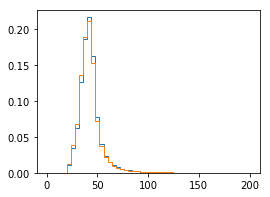

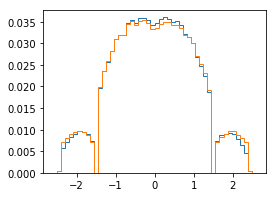

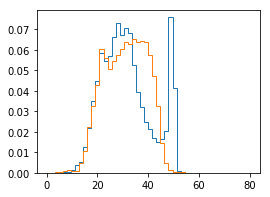

55.222984 56.572384


In [5]:
plt.rcParams["figure.figsize"] = (4,3)

plt.hist(pt[kdata], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt[kdata])/len(pt[kdata]))
plt.hist(pt[kmc], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt[kmc])/len(pt[kmc]))
plt.show()

plt.hist(eta[kdata], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta[kdata])/len(eta[kdata]))
plt.hist(eta[kmc], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta[kmc])/len(eta[kmc]))
plt.show()

plt.hist(pu[kdata], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu[kdata])/len(pu[kdata]))
plt.hist(pu[kmc], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu[kmc])/len(pu[kmc]))
plt.show()

print(pu[kdata].max(), pu[kmc].max())

In [6]:
pt_bins_ = {}
pt_bins_[0] = [10]
pt_bins_[1] = np.arange(20, 90, 2)
pt_bins_[2] = np.arange(90, 140, 10)
pt_bins_[3] = np.arange(140, 180, 20)
pt_bins_[4] = np.arange(180, 1500+1320, 1320)
#pt_bins_[4] = np.arange(500, 1500+1000, 1000)
pt_bins = [pt_bins_[i] for i in pt_bins_]
pt_bins = np.concatenate(pt_bins).flatten()
pt_bins
#print(pt['data2017'].max())

array([  10,   20,   22,   24,   26,   28,   30,   32,   34,   36,   38,
         40,   42,   44,   46,   48,   50,   52,   54,   56,   58,   60,
         62,   64,   66,   68,   70,   72,   74,   76,   78,   80,   82,
         84,   86,   88,   90,  100,  110,  120,  130,  140,  160,  180,
       1500])

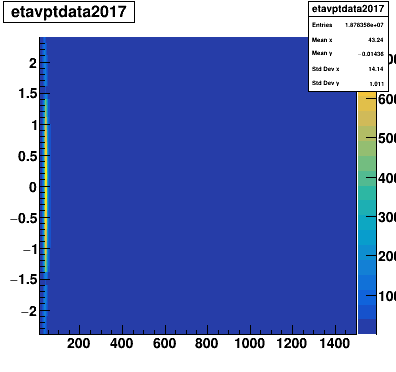

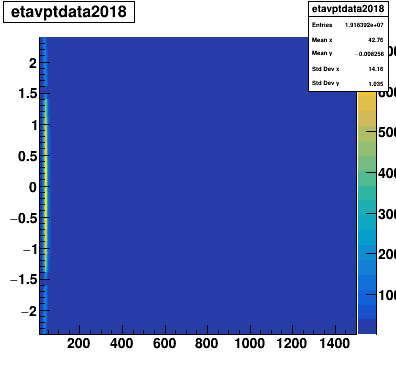

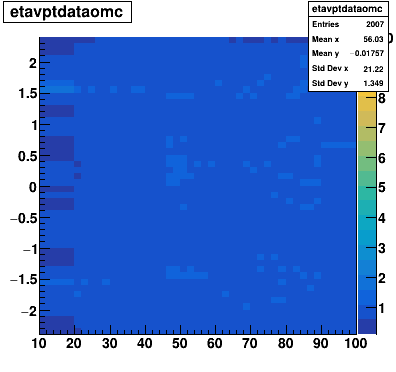

In [7]:
#'''
h, c = {}, {}

eta_edge = 2.4
#pt_lo, pt_hi = 20., 200.

s = kdata
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()

s = kmc
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavpt%s'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavpt%s'%kmc])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].SetMaximum(10.)
h[k].SetMinimum(1./10.)
h[k].Draw('COL Z')
c[k].Draw()
#'''

In [8]:
def get_ptetawgt(pt_, eta_, h, ceil=10.):

    ipt_  = h.GetXaxis().FindBin(pt_)
    ieta_ = h.GetYaxis().FindBin(eta_)
    wgt = h.GetBinContent(ipt_, ieta_)
    if wgt > ceil:
        wgt = ceil

    return wgt

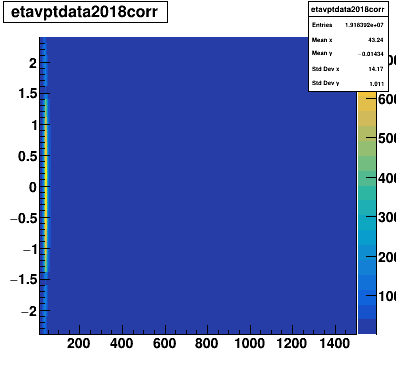

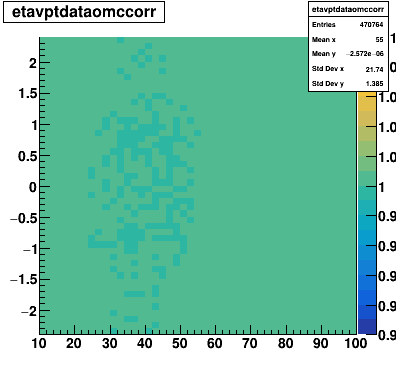

In [9]:
s = kmc
k = 'etavpt'+s+'corr'
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    #h[k].Fill(p, e)
    h[k].Fill(p, e, get_ptetawgt(p,e,h['etavptdataomc']))
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'+'corr'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavpt%s'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavpt%scorr'%kmc])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].SetMaximum(1.+0.1)
h[k].SetMinimum(1.-0.1)
h[k].Draw('COL Z')
c[k].Draw()
#'''

16202204.631
906.093383789
16203696.0
980.0


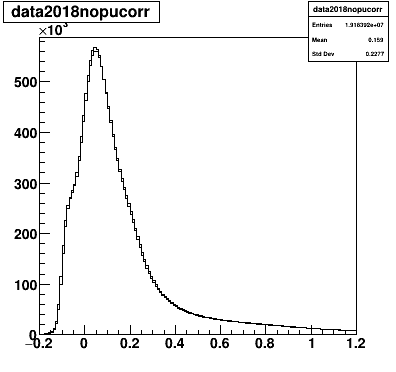

In [10]:
#h, c = {}, {}

#dM = 25
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', ma_bins)
#print(ma_bins)

k = kmc+'nopucorr'
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 400, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[kmc]):
    #if i+1 >= 100000: break
    #m = (1./0.97)*(m - 0.006)
    #m = 1.036*m - 0.005
    #m = 0.946*m
    #m = 1.01*np.random.normal(m, 0.012) # with correction
    #h[k].Fill(m, wgt['DYToEE'][i])
    #h[k].Fill(m)
    wgt = get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])
    h[k].Fill(m, wgt)
    h[kpu].Fill(pu[kmc][i], wgt)
h[k].Draw("hist")
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

k = kdata
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
#c[k] = ROOT.TCanvas(k, k, 600, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    h[k].Fill(m)
    h[kpu].Fill(pu[k][i])
#h[k].Draw("hist")
h[k].Draw("hist same")
#c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

In [11]:
print(h[kdata].GetMaximum())
print(h[kdata].GetMaximumBin())
print(h[kdata].GetXaxis().FindBin(0.))
print(ma_bins)
print(ma_bins[21-1])
print(ma_bins[25-1])
print(ma_bins[25+4-1])
print(ma_bins[10:34])

568005.0
25
21
array('d', [-0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2])
0.0
0.04
0.08
array('d', [-0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.0

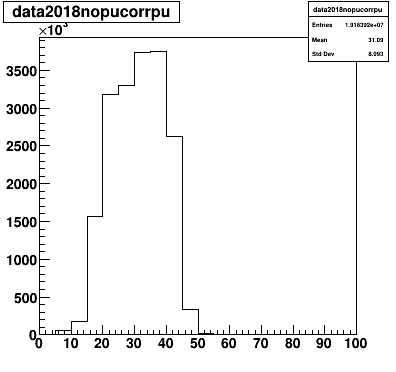

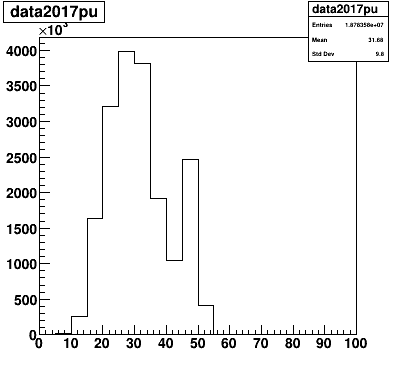

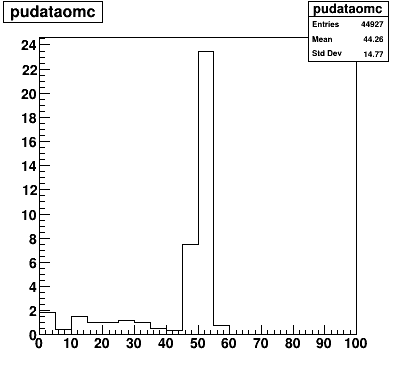

In [12]:
k = kmc+'nopucorr'
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = kdata
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = 'pudataomc'
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['%spu'%kdata].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h[kmc+'nopucorr'+'pu'])
h[k].Draw('hist')
c[k].Draw()

In [13]:
def get_puwgt(pu_, h):
    ipu_ = h.GetXaxis().FindBin(pu_)
    wgt = h.GetBinContent(ipu_)
    return wgt

In [14]:
hdata, _ = np.histogram(ma[kdata], bins=ma_bins)
print(hdata.sum())

dywgts_pteta_pu = [get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])*get_puwgt(pu[kmc][i], h['pudataomc']) for i,_ in enumerate(ma[kmc])]
print(len(dywgts_pteta_pu), len(ma[kmc]))

16203696
19183915 19183915


In [15]:
plt.rcParams["figure.figsize"] = (4,3)

def get_chisq(data, mc):
    #assert np.floor(data.sum()) == np.floor(mc.sum()), 'data:%f vs mc:%f'%(np.floor(data.sum()), np.floor(mc.sum()))
    chisq = (data - mc)**2.
    chisq = chisq/data
    chisq = chisq.sum()#/len(mc)-1
    return chisq

#def get_KS(data, mc, do_trunc=True):
def get_tests(data, mc, it):
    #print(data[:34])
    #print(mc[:34])
    assert data.sum()-mc.sum() < 1.
    #print(data.sum(), mc.sum())
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    
    chisq = get_chisq(data, mc)
    sumabs = np.sum(np.abs(data-mc))
    ks = np.max(np.abs(np.cumsum(data)-np.cumsum(mc)))
    #'''
    #print('sum abs(diff): %E'%np.sum(np.abs(data-mc)))
    #print('chisq: %E'%chisq)
    #print('KS: %E'%np.max(np.abs(np.cumsum(data)-np.cumsum(mc))))
    #for i,m in enumerate(ma_bins):
    #    #print(i, m, data[i], mc[i], data[i]-mc[i])
    #    if i >= 34: break
    #if do_trunc:
    data = data[10:34+1]
    mc = mc[10:34+1]
    #data = np.float32(data)/data.sum()
    #mc = np.float32(mc)/mc.sum()
    #for i,m in enumerate(ma_bins):
    #    if i+10 >= 34: break
    #    print(i+10, ma_bins[i+10], data[i], mc[i], np.abs(data[i]-mc[i]))
    if it == 0:
        plt.plot(data, label='data')
        plt.plot(mc, label='mc')
        plt.legend()
        plt.show()
    #print('sum abs(diff), trunc: %E'%np.sum(np.abs(data-mc)))
    #print('chisq, trunc: %E'%get_chisq(data, mc))
    #print(np.abs(data-mc))
    #data = np.cumsum(data)
    #mc = np.cumsum(mc)
    #print(data[-1], mc[-1])
    #print(np.abs(data-mc))
    #return np.max(np.abs(data-mc))
    #print('KS, trunc: %E'%np.max(np.abs(np.cumsum(data)-np.cumsum(mc))))
    #'''
    chisq_trunc = get_chisq(data, mc)
    sumabs_trunc = np.sum(np.abs(data-mc))
    ks_trunc = np.max(np.abs(np.cumsum(data)-np.cumsum(mc)))
    return [chisq, sumabs, ks, chisq_trunc, sumabs_trunc, ks_trunc]

def shift_ma(scale, smear, it):
    if smear == 0.:
        ma_ = scale*ma[kmc]
    else:
        #ma_ = scale*np.array([np.random.normal(m, smear) for m in ma[kmc]])
        ma_ = np.array([np.random.normal(scale*m, smear) for m in ma[kmc]])
    hmc_shift, _ = np.histogram(ma_, bins=ma_bins, weights=dywgts_pteta_pu)
    hmc_shift = np.float64(hmc_shift)
    #hmc_shift *= (h['Run2017'].Integral()/hmc_shift.sum())
    hmc_shift *= (hdata.sum()/hmc_shift.sum())
    #return get_chisq(hdata, hmc_shift)
    #return get_KS(hdata, hmc_shift)
    return get_tests(hdata, hmc_shift, it)

iteration: 1
scale: 0.988
smear: 0.004


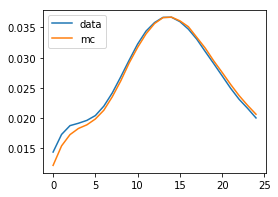

chisq:  2.215018E-03 +/- 5.543092E-06
sumabs: 3.133022E-02 +/- 8.947265E-05
ks:     1.561526E-02 +/- 4.017370E-05
-----------------------
chisq, trunc:  9.239319E-04 +/- 2.919212E-06
sumabs, trunc: 1.630845E-02 +/- 6.499735E-05
ks, trunc:     1.145556E-02 +/- 2.551096E-05

iteration: 2
scale: 0.988
smear: 0.006


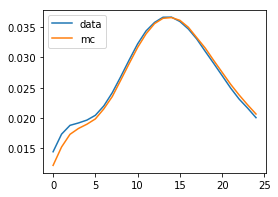

chisq:  2.133544E-03 +/- 4.862885E-06
sumabs: 3.133231E-02 +/- 1.113922E-05
ks:     1.562687E-02 +/- 6.809831E-06
-----------------------
chisq, trunc:  9.957307E-04 +/- 1.994366E-06
sumabs, trunc: 1.661655E-02 +/- 4.851492E-05
ks, trunc:     1.189227E-02 +/- 2.305210E-05

iteration: 3
scale: 0.988
smear: 0.008


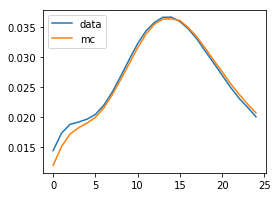

chisq:  2.109770E-03 +/- 6.654662E-06
sumabs: 3.167938E-02 +/- 9.051472E-05
ks:     1.578481E-02 +/- 3.590132E-05
-----------------------
chisq, trunc:  1.119852E-03 +/- 5.795767E-06
sumabs, trunc: 1.730123E-02 +/- 7.353163E-05
ks, trunc:     1.263773E-02 +/- 3.022397E-05

iteration: 4
scale: 0.988
smear: 0.01


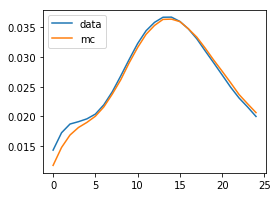

In [ ]:
# Do grid search

do_coarse = True
do_coarse = False

dS = 2
#dS = 4
steps = np.arange(dS,2*dS+dS,dS)/1.e3
if do_coarse:
    scale_nom = 1.
    smear_nom = 0.
    #scales_ = np.concatenate([[-0.004], np.arange(0,56+4,4)/1.e3])
    #smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
    scales_ = np.concatenate([[-0.036, -0.032, -0.028, -0.024, -0.020, -0.016, -0.012, -0.008, -0.004], np.arange(0,0+4,4)/1.e3])#8+4
    #scales_ = np.concatenate([[-0.008, -0.004], np.arange(0,12+4,4)/1.e3])#8+4
    smears_ = np.concatenate([np.arange(0,20+4,4)/1.e3])
else:
    scale_nom = 0.992 # use values from coarse scan
    smear_nom = 0.008 # use values from coarse scan
    scales_ = np.concatenate([-np.flip(steps), [0.], steps])
    smears_ = np.concatenate([-np.flip(steps), [0.], steps])

smears_ = np.array([sm for sm in smears_ if smear_nom+sm >= 0.]) # only allow positive smearing
chisqs_ = np.zeros((len(scales_), len(smears_)))
chisqtruncs_ = np.zeros((len(scales_), len(smears_)))
chisqs_stdev_ = np.zeros((len(scales_), len(smears_)))
chisqtruncs_stdev_ = np.zeros((len(scales_), len(smears_)))

n = 0
for a,s in enumerate(scales_):
    for b,sm in enumerate(smears_):
        n += 1
        #if n < 210: continue
        print('=======================')
        print('iteration:',n)
        scale = scale_nom + s
        smear = smear_nom + sm
        print('scale:',scale)
        print('smear:',smear)
        #'''
        #ks_test = [shift_ma(scale, smear) for i in range(10)]
        #print('chisq: %E +/- %E'%(np.mean(ks_test),np.std(ks_test)))
        tests = np.array([shift_ma(scale, smear, i) for i in range(1 if do_coarse else 2)])
        #print(tests.shape)
        print('chisq:  %E +/- %E'%(np.mean(tests[:,0]),np.std(tests[:,0])))
        print('sumabs: %E +/- %E'%(np.mean(tests[:,1]),np.std(tests[:,1])))
        print('ks:     %E +/- %E'%(np.mean(tests[:,2]),np.std(tests[:,2])))
        print('-----------------------')
        print('chisq, trunc:  %E +/- %E'%(np.mean(tests[:,3]),np.std(tests[:,3])))
        print('sumabs, trunc: %E +/- %E'%(np.mean(tests[:,4]),np.std(tests[:,4])))
        print('ks, trunc:     %E +/- %E'%(np.mean(tests[:,5]),np.std(tests[:,5])))
        chisqs_[a,b] = np.mean(tests[:,0])
        chisqtruncs_[a,b] = np.mean(tests[:,3])
        chisqs_stdev_[a,b] = np.std(tests[:,0])
        chisqtruncs_stdev_[a,b] = np.std(tests[:,3])
        print()
        #'''
        #break
    #break
print('>> Done.')

[[0.00211977 0.00208629 0.00217104 0.00283581 0.0045657  0.00821903]
 [0.00213795 0.0020825  0.00211738 0.00266668 0.00429196 0.00762035]
 [0.00220737 0.00212879 0.0020771  0.00250712 0.00399185 0.00696593]
 [0.00231401 0.00221908 0.00210116 0.00243799 0.00370291 0.00658316]
 [0.00245433 0.00234022 0.00217883 0.00237169 0.00349513 0.00630864]
 [0.00263917 0.00250904 0.00227123 0.00236813 0.00334066 0.00590234]
 [0.00286401 0.00270229 0.00240964 0.00239868 0.00322826 0.00558846]
 [0.0031321  0.00294441 0.00258831 0.00248068 0.00318697 0.00531924]
 [0.00343614 0.00322146 0.00280498 0.00260134 0.00312056 0.00512203]
 [0.00376893 0.00355572 0.00307135 0.00272453 0.00312439 0.00497101]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
>> arg@min: (7, 2)
>> 45: scale@min: 0.992, smear@min: 0.008, chisq@min: 2.077096E-03 +/- 0.000000

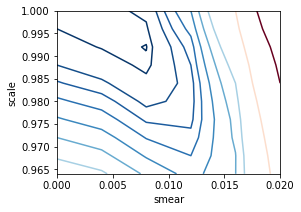

In [17]:
# Using full distn

#print(scales_)
#print(smears_)
#chisqs_stdev_ = chisqs_stdev_/chisqs_.max()
#chisqs_ = chisqs_/chisqs_.max()
print(np.flipud(chisqs_))
print(np.flipud(chisqs_stdev_))

lvls_ = np.sort(chisqs_.flatten())
lvls_ = [lvls_[i] for i in range(1, len(lvls_), len(lvls_)//10)]
minargs = tuple(np.argwhere(chisqs_ == chisqs_.min())[0])
it_ = np.argwhere(chisqs_.flatten() == chisqs_.min())[0]
print('>> arg@min:',minargs)
print('>> %d: scale@min: %4.3f, smear@min: %4.3f, chisq@min: %E +/- %E [c.f %E]'%(it_+1, scale_nom+scales_[minargs[0]], smear_nom+smears_[minargs[1]], chisqs_[minargs], chisqs_stdev_[minargs], chisqtruncs_[minargs]))
#lvls_ = np.linspace(chisqs_.min(), chisqs_.max(), 25)
plt.contour(smear_nom+smears_, scale_nom+scales_, chisqs_, levels=lvls_, cmap="RdBu_r")
plt.xlabel('smear')
plt.ylabel('scale')
plt.show()
#>> 45: scale@min: 0.992, smear@min: 0.008, chisq@min: 2.077096E-03 +/- 0.000000E+00 [c.f 1.097946E-03]

[[0.00090942 0.00096008 0.00112892 0.00145278 0.0019235  0.00251161]
 [0.00088255 0.0009391  0.00111872 0.0014349  0.0018856  0.00245048]
 [0.00086806 0.0009289  0.00109795 0.00141851 0.00185368 0.00237712]
 [0.00086755 0.00091207 0.00109815 0.00142444 0.00184396 0.00240243]
 [0.00088558 0.00093718 0.00113101 0.0014114  0.00185662 0.00240376]
 [0.0009122  0.00095776 0.00113867 0.00143662 0.00182731 0.00241543]
 [0.00095759 0.00100966 0.00119484 0.00148053 0.00189503 0.00237335]
 [0.00101189 0.00105867 0.00123347 0.00155332 0.00194725 0.00241404]
 [0.00108557 0.00114558 0.00130396 0.00156897 0.00196157 0.00245163]
 [0.00117633 0.00122622 0.00138052 0.00165625 0.00201249 0.00250816]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
>> arg@min: (6, 0)
>> 37: scale@min: 0.988, smear@min: 0.000, chisqtrunc@min: 8.675500E-04 +/- 0.0

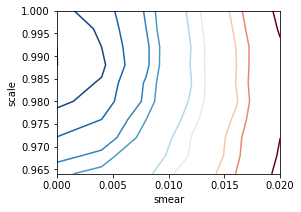

In [18]:
# Using truncated distn

#chisqtruncs_stdev_ = chisqtruncs_stdev_/chisqtruncs_.max()
#chisqtruncs_ = chisqtruncs_/chisqtruncs_.max()
print(np.flipud(chisqtruncs_))
print(np.flipud(chisqtruncs_stdev_))

lvls_ = np.sort(chisqtruncs_.flatten())
lvls_ = [lvls_[i] for i in range(1, len(lvls_), len(lvls_)//10)]
minargs = tuple(np.argwhere(chisqtruncs_ == chisqtruncs_.min())[0])
it_ = np.argwhere(chisqtruncs_.flatten() == chisqtruncs_.min())[0]
print('>> arg@min:',minargs)
print('>> %d: scale@min: %4.3f, smear@min: %4.3f, chisqtrunc@min: %E +/- %E [cf. %E]'%(it_+1, scale_nom+scales_[minargs[0]], smear_nom+smears_[minargs[1]], chisqtruncs_[minargs], chisqtruncs_stdev_[minargs], chisqs_[minargs]))
#lvls_ = np.linspace(chisqtruncs_.min(), chisqtruncs_.max(), 25)
plt.contour(smear_nom+smears_, scale_nom+scales_, chisqtruncs_, levels=lvls_, cmap="RdBu_r")
plt.xlabel('smear')
plt.ylabel('scale')
plt.show()

#>> 37: scale@min: 0.988, smear@min: 0.000, chisqtrunc@min: 8.675500E-04 +/- 0.000000E+00 [cf. 2.314014E-03]

In [ ]:
'''

>> era = 'ZeeSel-Era16Feb2021-Zeev1' #massreg
.. year: 2017, mc on data
   .. cntr: scale@min: 1.040, smear@min: 0.000, chisq@min: 1.774505E-03 +/- 2.168404E-19 [c.f 3.633237E-04]
            scale@min: 1.042, smear@min: 0.000, chisqtrunc@min: 3.550175E-04 +/- 5.421011E-20 [cf. 1.781710E-03]
   .. mid : scale@min: 1.026, smear@min: 0.000, chisq@min: 1.621759E-03 +/- 0.000000E+00 [c.f 4.483975E-04]
            scale@min: 1.024, smear@min: 0.002, chisqtrunc@min: 4.410110E-04 +/- 1.367683E-05 [cf. 1.638520E-03]
   .. fwd : scale@min: 1.054, smear@min: 0.000, chisq@min: 1.544912E-03 +/- 2.168404E-19 [c.f 5.207733E-04]
            scale@min: 1.046, smear@min: 0.000, chisq@min: 1.563982E-03 +/- 0.000000E+00 [c.f 4.814766E-04]
            scale@min: 1.044, smear@min: 0.000, chisqtrunc@min: 4.809390E-04 +/- 5.421011E-20 [cf. 1.593666E-03]
   .. all : scale@min: 1.040, smear@min: 0.000, chisq@min: 1.086890E-03 +/- 2.168404E-19 [c.f 1.521594E-04]
            scale@min: 1.040, smear@min: 0.000, chisqtrunc@min: 1.521594E-04 +/- 0.000000E+00 [cf. 1.086890E-03]

>> era = 'ZeeSel-Era16Feb2021-Zeev2' #h4g
.. year: 2016, mc on data
   .. cntr: scale@min: 1.010, smear@min: 0.004, chisq@min: 3.522561E-03 +/- 7.982228E-06 [c.f 1.495180E-03]
            !! scale@min: 1.002, smear@min: 0.000, chisqtrunc@min: 1.292833E-03 +/- 0.000000E+00 [cf. 3.729682E-03]
   .. mid : scale@min: 0.990, smear@min: 0.008, chisq@min: 2.060994E-03 +/- 1.892359E-05 [c.f 6.599622E-04]
            !! scale@min: 0.976, smear@min: 0.000, chisqtrunc@min: 3.523236E-04 +/- 0.000000E+00 [cf. 2.880211E-03]
   .. fwd : !! scale@min: 0.990, smear@min: 0.012, chisq@min: 4.402159E-04 +/- 1.177991E-05 [c.f 5.417141E-05]
            scale@min: 1.006, smear@min: 0.006, chisqtrunc@min: 3.287025E-05 +/- 3.508853E-06 [cf. 4.940435E-04]
   .. all :             
.. year: 2017, mc on data
   .. cntr: !! scale@min: 1.046, smear@min: 0.000, chisq@min: 0.949 +/- 0.000 [same for trunc]
   .. mid : scale@min: 1.032, smear@min: 0.000, chisq@min: 1.946813E-03 +/- 0.000000E+00 [c.f 6.869686E-04]
            !! scale@min: 1.014, smear@min: 0.000, chisqtrunc@min: 6.058120E-04 +/- 1.084202E-19 [cf. 2.343903E-03]
   .. fwd : !! scale@min: 1.056, smear@min: 0.000, chisq@min: 1.255065E-03 +/- 0.000000E+00 [c.f 3.885638E-04]
            scale@min: 1.042, smear@min: 0.004, chisqtrunc@min: 3.509827E-04 +/- 1.848163E-05 [cf. 1.378973E-03]
   .. all : scale@min: 1.042, smear@min: 0.000, chisq@min: 1.267071E-03 +/- 2.168404E-19 [c.f 3.272180E-04]
            scale@min: 1.040, smear@min: 0.000, chisqtrunc@min: 3.266640E-04 +/- 0.000000E+00 [cf. 1.292576E-03]
.. year: 2018, mc on data
   .. cntr: !! scale@min: 1.012, smear@min: 0.002, chisq@min: 1.769155E-03 +/- 1.577762E-05 [c.f 5.048928E-04]
            scale@min: 1.020, smear@min: 0.010, chisqtrunc@min: 2.887256E-04 +/- 1.816999E-05 [cf. 3.595038E-03]
   .. mid : !! scale@min: 1.016, smear@min: 0.000, chisq@min: 2.312448E-03 +/- 0.000000E+00 [c.f 7.399803E-04]
            scale@min: 1.028, smear@min: 0.000, chisqtrunc@min: 6.915821E-04 +/- 0.000000E+00 [cf. 2.521231E-03]
   .. fwd : !! scale@min: 1.044, smear@min: 0.000, chisq@min: 2.716866E-03 +/- 0.000000E+00 [c.f 1.165872E-03]
            scale@min: 1.042, smear@min: 0.000, chisqtrunc@min: 1.151928E-03 +/- 2.168404E-19 [cf. 2.719010E-03]
   .. all : scale@min: 1.018, smear@min: 0.000, chisq@min: 1.891401E-03 +/- 2.168404E-19 [c.f 6.365441E-04]
            scale@min: 1.028, smear@min: 0.010, chisqtrunc@min: 4.911112E-04 +/- 1.615858E-05 [cf. 3.287516E-03]

.. year: 2017 data on 2016 data
   .. fwd : scale@min: 0.950, smear@min: 0.018, chisq@min: 5.890849E-04 +/- 2.791718E-06 [c.f 2.744638E-04]
   .. all : 
.. year: 2018 data on 2017 data
   .. all : scale@min: 0.996, smear@min: 0.008, chisq@min: 8.365531E-04 +/- 0.000000E+00 [c.f 4.011317E-04]
            scale@min: 0.992, smear@min: 0.000, chisqtrunc@min: 2.820906E-04 +/- 0.000000E+00 [cf. 1.049136E-03]

'''

16239381.6711
16203696.0
898.814025879


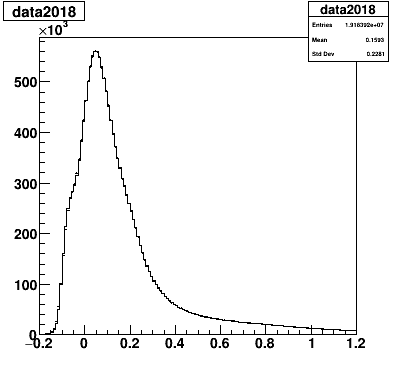

In [15]:
k = kmc
scale_ = 0.996 #0.992
smear_ = 0.008 #GeV
kshift = k+'shift'
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
h[kshift] = ROOT.TH1F(kshift, kshift, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 400, 400)
for i,m in enumerate(ma[k]):
    wgt = get_ptetawgt(pt[k][i], eta[k][i], h['etavptdataomc'])*get_puwgt(pu[k][i], h['pudataomc'])
    h[k].Fill(m, wgt)
    h[kshift].Fill(scale_*np.random.normal(m, smear_), wgt)
h[k].Draw("hist")
h[kshift].Draw('same')
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[kdata].Integral())
print(h[k].GetBinContent(1))

In [16]:
def get_stat_syst_graph(h, k, kshift, ksyst, scale=1.):

    for ib in range(1, h[k].GetNbinsX()+1):
        binc_nom = h[k].GetBinContent(ib)
        binc_shift = h[kshift].GetBinContent(ib)

        binerr_syst = binc_nom - binc_shift
        binerr_stat = h[k].GetBinError(ib)

        if binc_nom > binc_shift:
            binerr_up = binerr_stat
            binerr_dn = scale*np.sqrt(binerr_stat*binerr_stat + binerr_syst*binerr_syst)
        else:
            binerr_up = scale*np.sqrt(binerr_stat*binerr_stat + binerr_syst*binerr_syst)
            binerr_dn = binerr_stat

        if ib <= 2: print(ib, h[k].GetBinCenter(ib), binc_nom, binerr_stat, binerr_syst, ib-1, binerr_up, binerr_dn)
        h[ksyst].SetPoint(ib-1, h[k].GetBinCenter(ib), binc_nom)
        h[ksyst].SetPointError(
            ib-1,
            h[k].GetBinWidth(ib)/2.,
            h[k].GetBinWidth(ib)/2.,
            binerr_dn,
            binerr_up
            )

max: 0.0345174111426
1 -0.195 5.53477984795e-05 2.47716125375e-06 3.33326170221e-07 0 2.47716125375e-06 2.499486789891462e-06
2 -0.185 6.64701074129e-05 3.00204241205e-06 -2.1201412892e-06 1 3.6752221334088655e-06 3.00204241205e-06
13 TeV
0 5.53477984795e-05 5.28483116896e-05 5.78249597332e-05
1 6.64701074129e-05 6.34680650008e-05 7.01453295463e-05
2 9.09781665541e-05 8.79911013473e-05 9.60105805348e-05
3 0.000143448094605 0.000138680870587 0.000148892816062
4 0.000202567898668 0.000197175909153 0.000213417969229


/cvmfs/sft.cern.ch/lcg/views/LCG_97/x86_64-centos7-gcc8-opt/lib/ROOT.py:723: FutureWarning: buffer.SetSize(N) is deprecated and will disappear in a future version of ROOT. Instead, use buffer.reshape((N,))
  buf.SetSize(self.GetN())
Info in <TCanvas::Print>: pdf file Plots/ZeeSel-Era16Feb2021-Zeev2/DYToEE_data2017odata2018_ma1_ptetarwgt_scale0.996_smear0.008.pdf has been created


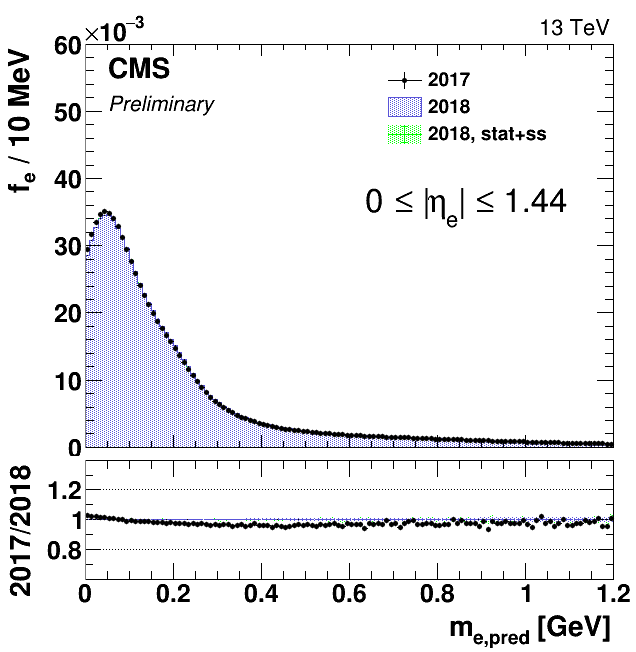

In [17]:
hc = {}

do_trunc = True
#do_trunc = False
data_on_data = True if ('data' in kdata) and ('data' in kmc) else False

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
#CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 11
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

err_style = 'E2'
fill_style = 3002
wd, ht = int(640*1), int(680*1)
ROOT.TGaxis.fgMaxDigits = 3
#ROOT.gStyle.SetErrorX(0)
#ROOT.gStyle.SetOptStat(0)

k = kdata
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)

pUp = ROOT.TPad("upperPad", "upperPad",.005, .300, .995, .995) # (,,Double_t xlow, Double_t ylow, Double_t xup, Double_t yup,...)
pDn = ROOT.TPad("lowerPad", "lowerPad",.005, .005, .995, .300)
pUp.Draw()
pDn.Draw()
pUp.SetMargin(13.e-02,3.e-02,2.e-02,9.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)
pDn.SetMargin(13.e-02,3.e-02,36.e-02,2.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)

pUp.cd()

# dummy hist for drawing axes
hdummy = h[k].Clone()
hdummy.Reset()
hdummy.SetName('dummy')
hdummy = set_hist(hdummy, "m_{e,pred} [GeV]", "f_{e}", "")
hdummy.GetYaxis().SetTitle('f_{e} / %d MeV'%dM)
hdummy.GetXaxis().SetTitle('')
hdummy.GetXaxis().SetLabelSize(0.)
hdummy.GetYaxis().SetTitleOffset(0.9)
hdummy.GetYaxis().SetTitleSize(0.07)
hdummy.GetYaxis().SetLabelSize(0.06)
hdummy.GetYaxis().SetMaxDigits(3)
hdummy.SetLineColor(0)
hdummy.Draw("hist")

# Plot MC
k = kmc
#if h[k].Integral() > 1.:
#    h[k].Scale(1./h[k].Integral())
if h[kdata].Integral() > 1.:
    h[kdata].Scale(1./h[kdata].Integral())
h[kmc].Scale(h[kdata].Integral()/h[kmc].Integral())
h[kshift].Scale(h[kdata].Integral()/h[kshift].Integral())
#h[k].Scale(1./h[kmc].GetEntries())
print('max:',h[k].GetMaximum())
# Plot total fill
hc[k] = h[k].Clone()
hc[k].SetName(k+'bulk')
hc[k].SetTitle(k+'bulk')
hc[k].SetLineColor(9)#11,3
hc[k].SetFillColor(9)#11,3
hc[k].SetFillStyle(fill_style)
hc[k].SetStats(0)
hc[k].Draw("hist same")
# Plot stat+syst uncert
ksyst = k+'_stat+systband'
h[ksyst] = ROOT.TGraphAsymmErrors()
h[ksyst].SetName(ksyst)
get_stat_syst_graph(h, k, kshift, ksyst) # set kshift=kdata to debug stat+syst ratio
h[ksyst].SetLineColor(3)
h[ksyst].SetFillColor(3)
h[ksyst].SetFillStyle(fill_style)
#h[ksyst].SetStats(0)
if do_trunc:
    h[ksyst].GetXaxis().SetRangeUser(0., 1.2)
h[ksyst].Draw("%s same"%err_style)
# Plot stat uncertainty
h[k].SetLineColor(9)
h[k].SetFillColor(9)
h[k].SetFillStyle(fill_style)
h[k].SetStats(0)
h[k].Draw("%s same"%err_style)

# Plot data
k = kdata
#if h[k].Integral() > 1.:
#    h[k].Scale(1./h[k].Integral())
#h[k].Scale(1./h[kdata].Integral())
hc[k] = h[k].Clone()
hc[k].SetName(kdata+'errs')
hc[k].SetFillStyle(0)
hc[k].SetMarkerStyle(20)
#hc[k].SetMarkerSize(0.85)
hc[k].SetMarkerSize(0.7)
hc[k].SetStats(0)
hc[k].Draw("E same")

#if ymax_ is None and hc[k].GetBinContent(2) > 0.:
ymax_lowbin = 1 if do_trunc else 2
if dM == 100:
    ymax = 6.e6
elif dM == 10:
    ymax = 6.e5
else:
    ymax = 1.3*max(np.max([hc[kdata].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kdata].GetNbinsX()+2)]),
                   np.max([hc[kmc].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kmc].GetNbinsX()+2)]))
#ymax = 6.e5 #dM=10
ymax = 4.e4
ymax = 1.2*h[kdata].GetMaximum()
#ymax = 8.e5
ymax = 0.05
ymax = 0.06
#hdummy.GetYaxis().SetRangeUser(0.1, ymax)
hdummy.GetYaxis().SetRangeUser(0., ymax)
if do_trunc:
    hdummy.GetXaxis().SetRangeUser(0., 1.2)
else:
    hdummy.GetXaxis().SetRangeUser(-0.2, 1.2)
ROOT.gPad.RedrawAxis()

l, l2, hatch = {}, {}, {}
legend = {}

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[0.,ymax]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
#hatch[k].SetLineWidth(5)
hatch[k].SetFillStyle(3004)
#hatch[k].SetFillColor(14)
hatch[k].SetFillColor(12)
#ROOT.gStyle.SetHatchesLineWidth(2)
hatch[k].Draw("same")

legend[k] = ROOT.TLegend(0.6,0.68,0.9,0.86) #(x1, y1, x2, y2)
legend[k].AddEntry(kdata+'errs', "Data" if not data_on_data else kdata.replace('data',''), "lep")
legend[k].AddEntry(hc[kmc].GetName(), "MC" if not data_on_data else kmc.replace('data',''), "f")
#legend[k].AddEntry(h[kmc].GetName(), "%s, stat"%('MC' if not data_on_data else kmc.replace('data','')), "lef")
legend[k].AddEntry(h[ksyst].GetName(), "%s, stat+%s"%\
                                       ('MC' if not data_on_data else kmc.replace('data',''),\
                                        'ss' if data_on_data else 'syst'), "lef")
legend[k].SetBorderSize(0)
legend[k].Draw("same")

if eta_range == 'cntr':
    etaText = '0 < |#eta_{e}| #leq 0.5'
elif eta_range == 'mid':
    etaText = '0.5 #leq |#eta_{e}| #leq 1.0'
elif eta_range == 'fwd':
    etaText = '1.0 #leq |#eta_{e}| #leq 1.44'
else:
    etaText = '0 #leq |#eta_{e}| #leq 1.44'
ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)#bold:62
ltx.SetTextAlign(32) #h:[1:left,2:ctr,3:right]x10 + v:[1:bot,2:ctr,3:top]
ltx.SetTextSize(0.08)
ltx.DrawLatex(0.9, 0.55, etaText) # x, y, text

CMS_lumi.CMS_lumi(pUp, iPeriod, iPos)

##### Ratio plots on lower pad #####
pDn.cd()
pDn.SetTicky()
pDn.SetGridy()
#'''
if do_trunc:
    fUnity = ROOT.TF1("fUnity","[0]",0.,1.2)
else:
    fUnity = ROOT.TF1("fUnity","[0]",-0.2,1.2)
fUnity.SetParameter( 0,1. )

fUnity.GetXaxis().SetTitle("m_{e,pred} [GeV]")
fUnity.GetXaxis().SetTickLength(0.1)
fUnity.GetXaxis().SetTitleOffset(1.05)
fUnity.GetXaxis().SetTitleSize(0.16)
fUnity.GetXaxis().SetLabelSize(0.14)
#if not do_trunc:
#    fUnity.GetXaxis().ChangeLabel(1,-1, 0,-1,-1,-1,"")
#    fUnity.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"#font[22]{#gamma_{veto}}")

dY = 0.199
dY = 0.399
#fUnity.GetYaxis().SetTitle("SB/SR")
fUnity.GetYaxis().SetTitle("Data/MC" if not data_on_data else '%s/%s'%(kdata.replace('data',''), kmc.replace('data','')))
#fUnity.GetYaxis().SetRangeUser(1.-dY,1.+dY)
fUnity.SetMaximum(1.+dY)
fUnity.SetMinimum(1.-dY)
fUnity.GetYaxis().SetNdivisions(305)
fUnity.GetYaxis().SetTickLength(0.04)
fUnity.GetYaxis().SetLabelFont(62)
fUnity.GetYaxis().SetTitleFont(62)
fUnity.GetYaxis().SetTitleOffset(.4)
fUnity.GetYaxis().SetTitleSize(0.16)
fUnity.GetYaxis().SetLabelSize(0.14)

fUnity.SetLineColor(9)
fUnity.SetLineWidth(1)
fUnity.SetLineStyle(7)
fUnity.SetTitle("")
fUnity.Draw()

#'''
# MC stat+syst uncert ratio bands
k = ksyst
kr = ksyst+'ratioband'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetN()):
    #ib = i+2
    ma_x = h[k].GetX()[i]
    ib = h[kmc].GetXaxis().FindBin(ma_x)
    binc_mc = h[kmc].GetBinContent(ib)
    
    bin_lo = h[k].GetY()[i] - h[k].GetEYlow()[i]
    bin_hi = h[k].GetY()[i] + h[k].GetEYhigh()[i]
    
    assert bin_lo <= binc_mc
    assert bin_hi >= binc_mc
    if i < 5:
        print(i, binc_mc, bin_lo, bin_hi)
    
    ratioerr_lo = 1. - bin_lo/binc_mc
    ratioerr_hi = bin_hi/binc_mc - 1.
    
    h[kr].SetPoint(i, ma_x, 1.)
    h[kr].SetPointError(
        i,
        h[k].GetEXlow()[i],
        h[k].GetEXhigh()[i],
        ratioerr_lo,
        ratioerr_hi
        )
#h[kr].SetFillColor(9)
h[kr].SetFillColor(3)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")
#'''

# MC stat uncert ratio bands
k = kmc
kr = kmc+'ratioband'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetNbinsX()-1):
    ib = i+2
    h[kr].SetPoint(i, h[k].GetBinCenter(ib), 1.)
    h[kr].SetPointError(
        i,
        h[k].GetBinWidth(ib)/2.,
        h[k].GetBinWidth(ib)/2.,
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        )
h[kr].SetFillColor(9)
#h[kr].SetFillColor(11)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")

# Data errors
kr = 'dataomc'+'errs'
h[kr] = h[kdata].Clone()
h[kr].Reset()
h[kr].SetName(kr)
for ib in range(1, h[k].GetNbinsX()+1):
    obs = h[kdata].GetBinContent(ib)
    obs_err = h[kdata].GetBinError(ib)
    bkg = h[kmc].GetBinContent(ib)
    if bkg == 0.: continue
    bkg_err = h[kmc].GetBinError(ib)
    h[kr].SetBinContent(ib, obs/bkg)
    h[kr].SetBinError(ib, obs_err/obs)
#h[kr].SetLineColor(9)
h[kr].SetStats(0)
#h[kr].Divide(h[kmc])
h[kr].SetMarkerStyle(20)
#h[kr].SetMarkerSize(0.85)
h[kr].SetMarkerSize(0.7)
h[kr].SetMarkerColor(1)
h[kr].SetLineColor(1) #9
h[kr].Draw("ep same")

k = kr
#l[k] = ROOT.TLine(0.135, 1.-dY, 0.135, 1.+dY) # x0,y0, x1,y1
#l[k].SetLineColor(14)
#l[k].SetLineStyle(7)
#l[k].Draw("same")

#l2[k] = ROOT.TLine(0.55, 1.-dY, 0.55, 1.+dY) # x0,y0, x1,y1
#l2[k].SetLineColor(14)
#l2[k].SetLineStyle(7)
#l2[k].Draw("same")

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[1.-dY,1.+dY]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
hatch[k].SetFillStyle(3004)
hatch[k].SetFillColor(14)
hatch[k].Draw("same")
#'''

k = kdata
c[k].Draw()
c[k].Update()
#c[k].Print('Plots/%s_sb2srvsr_blind_%s.eps'%(samples, blind))
#c[k].Print('Plots/%s_sb2srvsr_blind_%.eps'%(samples, blind))
#samples_str = '_'.join(samples)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_noptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_ptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_corr_ptrwgt.pdf'%dM)
if eta_range is None:
    pass
    c[k].Print('Plots/%s/DYToEE_%so%s_ma1_ptetarwgt_scale%4.3f_smear%4.3f.pdf'%(era, kdata, kmc, scale_, smear_))
else:
    pass
    c[k].Print('Plots/%s/DYToEE_%so%s_eta%s_ma1_ptetarwgt_scale%4.3f_smear%4.3f.pdf'%(era, kdata, kmc, eta_range, scale_, smear_))

#draw_hist_1dmastacked()

13 TeV


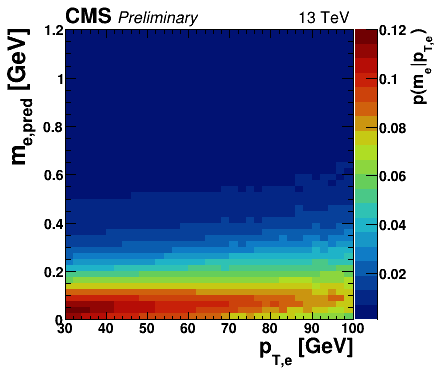

In [8]:
make_2dpdf = True

plot_dir = 'Plots/massreg/draft1'
print_pdf = False #True

#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
#CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumiTextSize = 0.6
CMS_lumi.cmsTextSize = 0.75
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.18
iPeriod = 0

wd, ht = int(440*1), int(400*1)
k = 'hmEvPt'
#'''
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
#h[k] = ROOT.TH2F(k, k, 50, 20., 100., 48, 0., 1.2)
h[k] = ROOT.TH2F(k, k, 35, 30., 100., 48, 0., 1.2)

s = 'data2017'
for m,p in zip(ma[s],pt[s]):
    #print(m,p)
    h[k].Fill(p, m)
    #break
#'''
    
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
#h[k], c[k] = set_hist(h[k], c[k], "p_{T,a} [GeV]", "m_{a,pred} [GeV]", "m_{a,pred} vs. p_{T,a}")
h[k] = set_hist(h[k], "p_{T,e} [GeV]", "m_{e,pred} [GeV]", "m_{e,pred} vs. p_{T,e}")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(0.9)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetTitle('N_{e}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
if make_2dpdf:
    #ROOT.gPad.SetLeftMargin(0.15)
    #ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{e}|p_{T,e})")
    #h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
h[k].SetMaximum(0.12)
h[k].Draw("COL Z")
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
if make_2dpdf:
    palette = h[k].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.815)
    palette.SetX2NDC(0.865)
    palette.SetY2NDC(0.92)
#palette[k] = h[k].GetListOfFunctions().FindObject("palette")
#palette[k].SetX1NDC(0.84)
#palette[k].SetX2NDC(0.89)
#palette[k].SetY1NDC(0.13)
#palette[k].SetY2NDC(0.9)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))

13 TeV


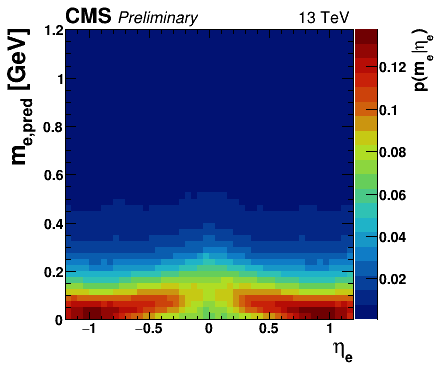

In [9]:
k = 'hmEvEta'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, 48, -1.2, 1.2, 48, 0., 1.2)

s = 'data2017'
for m,e in zip(ma[s],eta[s]):
    #print(m,p)
    if m < 0: continue
    h[k].Fill(e, m)
    #break

k = 'hmEvEta'
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
#h[k], c[k] = set_hist(h[k], c[k], "#eta_{a}", "m_{a,pred} [GeV]", "m_{a,pred} vs. #eta_{a}")
h[k] = set_hist(h[k], "#eta_{e}", "m_{e,pred} [GeV]", "m_{e,pred} vs. #eta_{e}")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(0.9)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetTitle('N_{e}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
#'''
if make_2dpdf:
    #ROOT.gPad.SetLeftMargin(0.15)
    #ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{e}|#eta_{e})")
    #h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
#'''
h[k].Draw("COL Z")
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
if make_2dpdf:
    palette = h[k].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.815)
    palette.SetX2NDC(0.865)
    palette.SetY2NDC(0.92)
#palette[k] = h[k].GetListOfFunctions().FindObject("palette")
#palette[k].SetX1NDC(0.84)
#palette[k].SetX2NDC(0.89)
#palette[k].SetY1NDC(0.12)
#palette[k].SetY2NDC(0.9)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))

0.321095 55.222984
hmEvPU
13 TeV


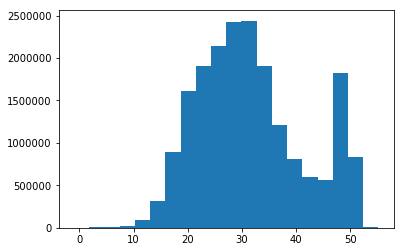

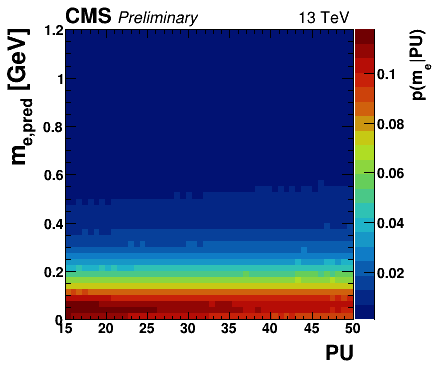

In [10]:
k = 'hmEvPU'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, 50, 15, 50, 48, 0., 1.2)

s = 'data2017'
print(np.min(pu[s][pu[s]>0.]), np.max(pu[s]))
for m,pu_ in zip(ma[s],pu[s]):
    #print(m,p)
    h[k].Fill(pu_, m)
    #break

k = 'hmEvPU'
print(k)
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
#h[k], c[k] = set_hist(h[k], c[k], "PU", "m_{a,pred} [GeV]", "m_{a,pred} vs. PU")
h[k] = set_hist(h[k], "PU", "m_{e,pred} [GeV]", "m_{e,pred} vs. PU")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(0.9)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetTitle('N_{e}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
#'''
if make_2dpdf:
    #ROOT.gPad.SetLeftMargin(0.15)
    #ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{e}|PU)")
    #h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
#'''
h[k].Draw("COL Z")
#h[k].SetMaximum(70.)
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
#palette = h[k].GetListOfFunctions().FindObject("palette")
#palette.SetX1NDC(0.808)
#palette.SetX2NDC(0.858)
#palette.SetY1NDC(0.13)
#palette.SetY2NDC(0.9)

#c[k].SetGrid()
#c[k].Draw()
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))
plt.hist(pu[s], bins=20)
plt.show()